In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
 # This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [0]:
import seaborn as sln
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
train=pd.read_csv('/content/drive/My Drive/train_F3WbcTw.csv')

In [0]:
train.head()

NameError: ignored

In [0]:
names={2:'neutral',1:'negative',0:'positive'}

In [0]:
train['sentiment']=train['sentiment'].replace(names)

In [0]:
train['sentiment'][1]

2

In [0]:
train['text'][1]

'I can completely understand why you’d want to try it. But, results reported in lectures don’t always stand up to the scrutiny of peer-review during publication. There so much still to do before this is convincing. I hope that it does work out, I really do. And if you’re aware of and happy with the risks, then that’s great. I just think it’s important to present this in a balanced way, and to understand why we don’t move straight from the first show of promise in an animal study to using drugs on humans. There’s still a lot of animal data to gather, and human data to gather before anyone can tell if it’s safe or effective. I can’t tell you how many times animal studies don’t follow through to humans, but it’s one of the major attrition points in drug development. You’ve been through some of the unpredictability issues with Cladribine/Gilenya, where there was an interaction that wasn’t predicted. But once people try it, the doctors can see patterns and work out what’s going on. Clemasti

In [0]:
drug_names=train['drug'].unique().tolist()

In [0]:
#check for number of references of other drugs in each sentence
def references(data:pd.DataFrame,drugs:list):
  references=[]
  for sentence in data['text']:
    buffer=[]
    
    for drug in drugs:
      if drug in sentence.lower():
        buffer.append(drug)
        
    references.append(buffer)    
    
  return references
  

In [0]:
ref=references(train,drug_names)

NameError: ignored

In [0]:
train['references']=ref

In [0]:
train.head()

,unique_hash,text,drug,sentiment,references
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2,"[gilenya, tysabri]"
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2,"[gilenya, cladribine]"
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2,"[fingolimod, siponimod]"
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2,"[ocrevus, lemtrada]"
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1,[gilenya]


In [0]:
train['text'][3]

'Very interesting, grand merci. Now I wonder where lemtrada and ocrevus sales would go, if they prove anti-cd20 are induction'

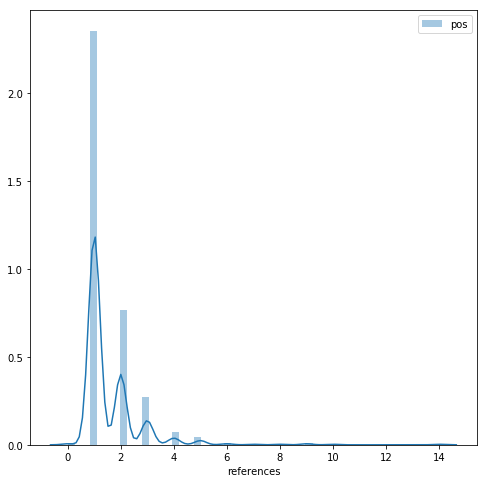

In [0]:
plt.figure(figsize=(8,8))
sln.distplot(train[train['sentiment']=='positive']['references'],label='pos')
# sln.distplot(train[train['sentiment']=='negative']['references'],label='neg')
# sln.distplot(train[train['sentiment']=='neutral']['references'],label='neu')
plt.legend()


In [0]:
train['references'].max()

32

In [0]:
train[train['references']==32]['text'][643]

"In recent years, there have been exciting developments in treating lung cancer. Through genetic testing of tumor samples, doctors can identify specific types of lung tumors and prescribe treatments designed to target them. Immunotherapy has also emerged as a treatment option for certain types of lung cancers. These advances have made treatments more effective, often with fewer side effects.  Types of Lung Cancer There are two major types of lung cancer: non-small cell lung cancer (NSCLC) and small cell lung cancer (SCLC). NSCLC accounts for about 85 percent of lung cancers and includes adenocarcinoma (the most common form of lung cancer in the United States among both men and women), squamous cell carcinoma, and large cell carcinoma. SCLC tumors account for the remaining 15 percent of lung cancers in the United States. They tend to grow more quickly than NSCLC tumors. Tumors are classified by stage. Stages are based on whether the cancer is local (in the lung only), locally advanced (

In [0]:
train.iloc[643]

unique_hash             bc55603c74a117f174458fd9c60066c27c9ace66
text           In recent years, there have been exciting deve...
drug                                                   alectinib
sentiment                                                neutral
references                                                    32
Name: 643, dtype: object

In [0]:
d1=train[train['drug']=='gilenya']

In [0]:
d1[d1['sentiment']=='negative']['text'][73]

'Hi everyone, I wonder if anyone here has experienced a pretty bad pseudo-relapse and how do you know it’s that? I had 2 very bad relapses in the space of 4 months in 2016 (the second one happened 3 weeks after starting Gilenya). I had just started to regain more mobility before Christmas and finally felt like I was recovering when I woke up Christmas morning to this nasty cold everyone is getting. It weakened me and the amount I was able to walk but that was to be expected – nothing too mad. The thing is since then I can’t shake it. I’ve not had a full night’s sleep since 23rd December – I’m not sure if this insomnia is caused from the cold or the increased dose of baclofen I started in mid-Dec. Either way the result is I completely lost the use of my right leg yesterday and all the awful nerve pain that comes with that (exactly the same as my last relapse in Sept that I was only recovering from)! Could this be a pseudo-relapse caused by the cold and the fact I’m not sleeping or could

In [0]:
#count ? marks
train['qmarks_num']=train['text'].apply(lambda x:x.count('?'))

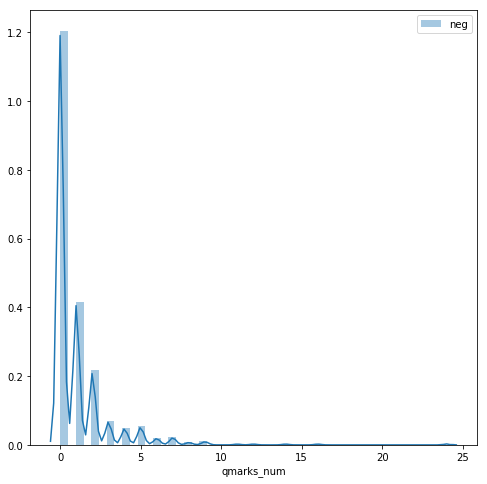

In [0]:
plt.figure(figsize=(8,8))
# sln.distplot(train[train['sentiment']=='positive']['qmarks_num'],label='pos')
sln.distplot(train[train['sentiment']=='negative']['qmarks_num'],label='neg')
# sln.distplot(train[train['sentiment']=='neutral']['qmarks_num'],label='neu')
plt.legend()


Using Vader as the base model

In [0]:
from sklearn.model_selection import train_test_split
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
sid_obj = SentimentIntensityAnalyzer()

In [0]:
def base_vader(data,column):
  compound=[]
  neg=[]
  pos=[]
  neu=[]
  
  for sent in data[column]:
    score=sid_obj.polarity_scores(sent)
    compound.append(score['compound'])
    neg.append(score['neg'])
    pos.append(score['pos'])
    neu.append(score['neu'])
  
  
  return compound,neg,pos,neu
    
    

In [0]:
train.head()

,unique_hash,text,drug,sentiment,references,com,neg,pos,neu
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2,"[gilenya, tysabri]",0.431,0.16,0.18,0.661
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2,"[gilenya, cladribine]",0.431,0.16,0.18,0.661
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2,"[fingolimod, siponimod]",0.431,0.16,0.18,0.661
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2,"[ocrevus, lemtrada]",0.431,0.16,0.18,0.661
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1,[gilenya],0.431,0.16,0.18,0.661


In [0]:
train['com'],train['neg'],train['pos'],train['neu']=base_vader(train)

TypeError: ignored

In [0]:
from nltk import sent_tokenize

In [0]:
sent_tokenize(train['text'][0])

['Autoimmune diseases tend to come in clusters.',
 'As for Gilenya – if you feel good, don’t think about it, it won’t change anything but waste your time and energy.',
 'I’m taking Tysabri and feel amazing, no symptoms (other than dodgy color vision, but I’ve had it since always, so, don’t know) and I don’t know if it will last a month, a year, a decade, ive just decided to enjoy the ride, no point in worrying.']

In [0]:
sid_obj.polarity_scores('As for Gilenya – if you feel good, don’t think about it, it won’t change anything but waste your time and energy.')

{'compound': -0.0258, 'neg': 0.141, 'neu': 0.684, 'pos': 0.175}

In [0]:
np.average(train['len'])

1987.7865125970827

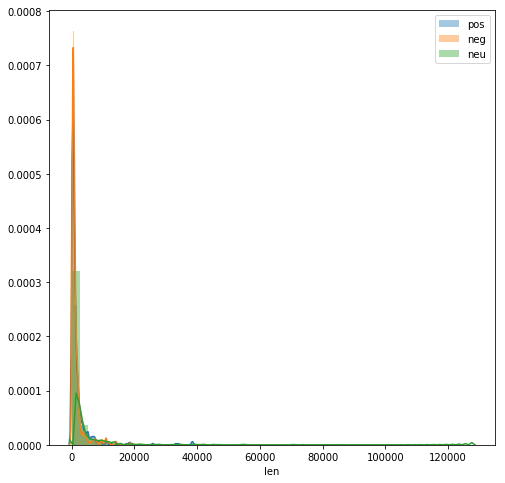

In [0]:
plt.figure(figsize=(8,8))
sln.distplot(train[train['sentiment']=='positive']['len'],label='pos')
sln.distplot(train[train['sentiment']=='negative']['len'],label='neg')
sln.distplot(train[train['sentiment']=='neutral']['len'],label='neu')
plt.legend()


In [0]:
#trying multi tasking
#lemmatize and remove stop words except 'negation' words
#for our base model lets just lemmatize and remove any special characters etc
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
lemmatizer = WordNetLemmatizer() 
tt = TweetTokenizer()

def clean(data):
  data['text']=data['text'].apply(lambda x :re.sub('\W+',' ', x))
  data['clean_text']=data['text'].apply(lambda x:' '.join(lemmatizer.lemmatize(word) for word in tt.tokenize(x)))
  return data

In [0]:
train_new=clean(train)

In [0]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
train_new.head()

,unique_hash,text,drug,sentiment,references,drug_only_text,com_drug,neg_drug,pos_drug,neu_drug,clean_text
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters A...,gilenya,2,"[gilenya, tysabri]","As for Gilenya – if you feel good, don’t thin...",-0.0258,0.141,0.175,0.684,Autoimmune disease tend to come in cluster As ...
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you d want to ...,gilenya,2,"[gilenya, cladribine]",You’ve been through some of the unpredictabil...,0.0000,0.000,0.000,1.000,I can completely understand why you d want to ...
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P 1 5 recep...,fingolimod,2,"[fingolimod, siponimod]",Interesting that it only targets S1P-1/5 rece...,0.6369,0.000,0.342,0.658,Interesting that it only target S1P 1 5 recept...
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,Very interesting grand merci Now I wonder wher...,ocrevus,2,"[ocrevus, lemtrada]",Now I wonder where lemtrada and ocrevus sales...,0.0000,0.000,0.000,1.000,Very interesting grand merci Now I wonder wher...
4,b227688381f9b25e5b65109dd00f7f895e838249,Hi everybody My latest MRI results for Brain a...,gilenya,1,[gilenya],There’re no new lesions in Brain/Cord and I’v...,-0.5267,0.253,0.000,0.747,Hi everybody My latest MRI result for Brain an...


In [0]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from keras.models import Model
from keras.layers import Input, Dense,Flatten,LSTM,Embedding,Dropout,BatchNormalization,GaussianNoise,Bidirectional
from keras.callbacks import EarlyStopping,ModelCheckpoint

In [0]:
#lets build the model
def load_data_kfold(k):
  
  X=train_new.drop(['text','unique_hash','sentiment'],axis=1)
  y=train_new['sentiment'].values
                                                                                                 
  folds = list(StratifiedKFold(n_splits=k, shuffle=True, random_state=1).split(X, y))
    
  return folds, X,y



In [0]:
train_new.head()

,unique_hash,text,drug,sentiment,references,drug_only_text,com_drug,neg_drug,pos_drug,neu_drug,clean_text
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters A...,gilenya,2,"[gilenya, tysabri]","As for Gilenya – if you feel good, don’t thin...",-0.0258,0.141,0.175,0.684,Autoimmune disease tend to come in cluster As ...
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you d want to ...,gilenya,2,"[gilenya, cladribine]",You’ve been through some of the unpredictabil...,0.0000,0.000,0.000,1.000,I can completely understand why you d want to ...
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P 1 5 recep...,fingolimod,2,"[fingolimod, siponimod]",Interesting that it only targets S1P-1/5 rece...,0.6369,0.000,0.342,0.658,Interesting that it only target S1P 1 5 recept...
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,Very interesting grand merci Now I wonder wher...,ocrevus,2,"[ocrevus, lemtrada]",Now I wonder where lemtrada and ocrevus sales...,0.0000,0.000,0.000,1.000,Very interesting grand merci Now I wonder wher...
4,b227688381f9b25e5b65109dd00f7f895e838249,Hi everybody My latest MRI results for Brain a...,gilenya,1,[gilenya],There’re no new lesions in Brain/Cord and I’v...,-0.5267,0.253,0.000,0.747,Hi everybody My latest MRI result for Brain an...


Encode the text

In [0]:
import keras
from keras.preprocessing.text import one_hot,Tokenizer
from keras.preprocessing.sequence import pad_sequences
vocab_size=1800
encoded_docs_train = [one_hot(d, vocab_size) for d in train_new]
encoded_docs_train = [one_hot(d, vocab_size) for d in train_new['clean_text']]

In [0]:
#lets fix the padding as 400
max_length = 300
padded_docs_train = pad_sequences(encoded_docs_train, maxlen=max_length, padding='post')

In [0]:
def get_model():
  
  
    
  text_input = Input(shape=(300,), dtype='int32', name='text_input')
  # This embedding layer will encode the input sequence
  # into a sequence of dense 512-dimensional vectors.
  x = Embedding(vocab_size, 512, input_length=max_length)(text_input)
  x= BatchNormalization()(x)
  # A LSTM will transform the vector sequence into a single vector,
  # containing information about the entire sequence
 # x=GaussianNoise(0.2)(x)
  lstm_out = Bidirectional(LSTM(64))(x)

  auxiliary_input = Input(shape=(4,), name='aux_input')
  x = keras.layers.concatenate([lstm_out, auxiliary_input],axis=-1)
  x = Dense(64, activation='relu')(x)
  x=Dropout(0.2)(x)
  x = Dense(64, activation='relu')(x)
  x=Dropout(0.3)(x)
  x = Dense(64, activation='relu')(x)
  main_output = Dense(3, activation='softmax', name='main_output')(x)
  second_output=Dense(102, activation='softmax', name='second_output')(x)
  model = Model(inputs=[text_input,auxiliary_input], outputs=[main_output,second_output])
  opt_adam = keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.1)
  model.compile(opt_adam, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
   
  return model

In [0]:
model = get_model()
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input (InputLayer)         (None, 300)          0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 300, 512)     921600      text_input[0][0]                 
__________________________________________________________________________________________________
batch_normalization_5 (BatchNor (None, 300, 512)     2048        embedding_5[0][0]                
__________________________________________________________________________________________________
bidirectional_5 (Bidirectional) (None, 128)          295424      batch_normalization_5[0][0]      
__________________________________________________________________________________________________
aux_input 

In [0]:
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical


In [0]:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall


In [0]:
encoder = LabelEncoder()
encoder.fit(train_new['drug'])
Y2 = encoder.transform(train_new['drug'])
Y2 = np_utils.to_categorical(Y2)

In [0]:
encoder = LabelEncoder()
encoder.fit(train_new['sentiment'])
Y = encoder.transform(train_new['sentiment'])
Y = np_utils.to_categorical(Y)

In [0]:
text=['clean_text']
numerical=['com_drug','neg_drug','pos_drug','neu_drug',]

In [0]:
inv_map = {v: k for k, v in names.items()}

In [0]:
class Metrics(Callback):
  
  def on_train_begin(self, logs={}):
   self.val_f1s = []
   self.val_recalls = []
   self.val_precisions = []

  def on_epoch_end(self, epoch, logs={}):
   val_predict = (np.asarray(self.model.predict(self.model.validation_data[0]))).round()
   val_targ = self.model.validation_data[1]
   _val_f1 = f1_score(val_targ, val_predict)
   _val_recall = recall_score(val_targ, val_predict)
   _val_precision = precision_score(val_targ, val_predict)
   self.val_f1s.append(_val_f1)
   self.val_recalls.append(_val_recall)
   self.val_precisions.append(_val_precision)
   print (' — val_f1: %f — val_precision: %f — val_recall %f' %(_val_f1, _val_precision, _val_recall))
   return

metrics = Metrics()

In [0]:
train_new['sentiment']=train_new['sentiment'].replace(inv_map)

In [0]:
model.fit([padded_docs_train,train_new[numerical]],
                [Y,Y2],
                epochs=7,
                shuffle=True,
                verbose=1,
                validation_split=0.3,
                )
    


W0727 10:06:56.153198 140702063646592 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 3695 samples, validate on 1584 samples
Epoch 1/7
3695/3695 [==============================] - 140s 38ms/step - loss: 4.2585 - main_output_loss: 0.8132 - second_output_loss: 3.4453 - main_output_categorical_accuracy: 0.7237 - second_output_categorical_accuracy: 0.1204 - val_loss: 4.1277 - val_main_output_loss: 0.7972 - val_second_output_loss: 3.3304 - val_main_output_categorical_accuracy: 0.7172 - val_second_output_categorical_accuracy: 0.1427
Epoch 2/7
3695/3695 [==============================] - 136s 37ms/step - loss: 4.0157 - main_output_loss: 0.7642 - second_output_loss: 3.2515 - main_output_categorical_accuracy: 0.7277 - second_output_categorical_accuracy: 0.1429 - val_loss: 4.0970 - val_main_output_loss: 0.7947 - val_second_output_loss: 3.3023 - val_main_output_categorical_accuracy: 0.7172 - val_second_output_categorical_accuracy: 0.1471
Epoch 3/7
3695/3695 [==============================] - 135s 37ms/step - loss: 3.9307 - main_output_loss: 0.7488 - second_output_loss: 3.

In [0]:
#load test
test=pd.read_csv('/content/drive/My Drive/test_tOlRoBf.csv')

In [0]:
drug_test_names=test['drug'].unique().tolist()

In [0]:
def preprocessing(data):
  data['com'],data['neg'],data['pos'],data['neu']=base_vader(data)
  data_new=clean(data)
  data_new['len']=data_new['clean_text'].apply(lambda x:len(x))
  return data_new
  
  

In [0]:
test_new=preprocessing(test)

In [0]:
vocab_size=1800
encoded_docs_test = [one_hot(d, vocab_size) for d in test_new['clean_text']]
max_length = 300
padded_docs_test = pad_sequences(encoded_docs_test, maxlen=max_length, padding='post')


In [0]:
pred1=model.predict([padded_docs_test,test_new[numerical]])

In [0]:
indexes=np.argmax(pred1,axis=1)

In [0]:
indexes

array([2, 2, 2, ..., 2, 2, 2])

ALL TOGETHER DIFFERENT ATTEMPT

In [0]:
train.head()

,unique_hash,text,drug,sentiment,references,drug_only_text,com_drug,neg_drug,pos_drug,neu_drug
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2,"[gilenya, tysabri]","As for Gilenya – if you feel good, don’t thin...",-0.0258,0.141,0.175,0.684
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2,"[gilenya, cladribine]",You’ve been through some of the unpredictabil...,0.0000,0.000,0.000,1.000
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2,"[fingolimod, siponimod]",Interesting that it only targets S1P-1/5 rece...,0.6369,0.000,0.342,0.658
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2,"[ocrevus, lemtrada]",Now I wonder where lemtrada and ocrevus sales...,0.0000,0.000,0.000,1.000
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1,[gilenya],There’re no new lesions in Brain/Cord and I’v...,-0.5267,0.253,0.000,0.747


In [0]:
#sentiment for the only sentence contaning drug
import re
from nltk import sent_tokenize
new_text=[]
for text,drug in zip(train['text'],train['drug']):
  txt=' '
  
  for sent in sent_tokenize(text):
    if re.search(drug,sent.lower())!=None:
      txt+=sent+''
      
  new_text.append(txt)   
         

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
train['drug_only_text']=new_text

In [0]:
train['com_drug'],train['neg_drug'],train['pos_drug'],train['neu_drug']=base_vader(train,'drug_only_text')

In [0]:
# lets have a look at all negative sentence regarding one drug
train[(train['sentiment']==0) & (train['drug']=='gilenya')]['drug_only_text'][704]

' In May 2018, Novartis announced FDA approval of Gilenya ® as the first disease-modifying therapy f or the treatment of children and adolescents 10 to less than 18 years of age with relapsing forms of multiple sclerosis (RMS), making it the first disease-modifying therapy indicated for these patients[2].This approval expands the age range for Gilenya, which was previously approved for patients aged 18 years and older with RMS.Gilenya was granted Breakthrough Therapy designation by the FDA in December of 2017 for this pediatric indication.'

In [0]:
from textblob import TextBlob

In [0]:
def textBlob(data):
  polarity=[]
  subject=[]
  
  for sent in data['drug_only_text']:
    polarity.append(TextBlob(sent).sentiment[0])
    subject.append(TextBlob(sent).sentiment[1])
  return polarity,subject

In [0]:
train['blob_score'],train['blob_sub']=textBlob(train)

In [0]:
import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§?₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

In [0]:
import pandas as pd, numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [0]:
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
             min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1 ,max_features=3000)
trn_term_doc = vec.fit_transform(train['drug_only_text'])
test_term_doc = vec.transform(test['drug_only_text'])

In [0]:
new_text=[]
for text,drug in zip(test['text'],test['drug']):
  txt=' '
  
  for sent in sent_tokenize(text):
    if re.search(drug,sent.lower())!=None:
      txt+=sent+''
      
  new_text.append(txt)   
      

In [0]:
test['drug_only_text']=new_text

In [0]:
train_new.columns

Index(['unique_hash', 'text', 'drug', 'sentiment', 'references',
       'drug_only_text', 'com_drug', 'neg_drug', 'pos_drug', 'neu_drug',
       'clean_text', 'blob_score', 'blob_sub'],
      dtype='object')

In [0]:
num_cols=['com_drug','neg_drug','pos_drug','neu_drug','blob_score','blob_sub']

In [0]:
test['com_drug'],test['neg_drug'],test['pos_drug'],test['neu_drug']=base_vader(test,'drug_only_text')

In [0]:
test['blob_score'],test['blob_sub']=textBlob(test)

In [0]:
train_comb=pd.concat([trn_term_doc,train_new[num_cols]],axis=1)

In [0]:
test_comb=pd.concat([test_term_doc,test[num_cols]],axis=1)

In [0]:
x = trn_term_doc
test_x = test_term_doc

In [0]:
type(x)

scipy.sparse.csr.csr_matrix

In [0]:
test_x=np.matrix(test_comb)

In [0]:
dummy=pd.get_dummies(train['sentiment'])

In [0]:
train=pd.concat([train,dummy],axis=1)

In [0]:
def pr(y_i, y):
    p = x[y==y_i].sum(0)
    return (p+1) / ((y==y_i).sum()+1)

In [0]:
def get_mdl(y):
    y = y.values
    r = np.log(pr(1,y) / pr(0,y))
    m = LogisticRegression(C=10, dual=True)
    x_nb = x.multiply(r)
    return m.fit(x_nb, y), r

In [0]:
label_cols=[0,1,2]

In [0]:
preds = np.zeros((len(test), len(label_cols)))

for i, j in enumerate(label_cols):
    print('fit', j)
    m,r = get_mdl(train[j])
    preds[:,i] = m.predict_proba(test_x.multiply(r))[:,1]

fit 0
fit 1
fit 2


In [0]:
index=np.argmax(preds,axis=1)

In [0]:
my_sub=pd.DataFrame({'unique_hash':test.unique_hash,'sentiment':index})

In [0]:
my_sub.to_csv('sub11.csv',index=False)

In [0]:
my_sub.head()

,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,2
2,50b6d851bcff4f35afe354937949e9948975adf7,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2


In [0]:
my_sub['sentiment'].value_counts()

2    2548
1     254
0     122
Name: sentiment, dtype: int64

In [0]:
#probability of each class
train['sentiment'].value_counts()/train.shape[0]

2    0.724569
1    0.158553
0    0.116878
Name: sentiment, dtype: float64

In [0]:
all_text = pd.concat([train['drug_only_text'], test['drug_only_text']])

In [0]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.ensemble import RandomForestClassifier

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 6),
    max_features=10000)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(train['drug_only_text'])
test_word_features = word_vectorizer.transform(test['drug_only_text'])

char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(train['drug_only_text'])
test_char_features = char_vectorizer.transform(test['drug_only_text'])
numerical_train=sparse.csr_matrix(train[num_cols])
numerical_test=sparse.csr_matrix(test[num_cols])
print(type(train_char_features))
train_features = hstack([train_char_features, train_word_features,numerical_train])
test_features = hstack([test_char_features, test_word_features,numerical_test])


scores = []
submission = pd.DataFrame.from_dict({'unique_hash': test['unique_hash']})
for class_name in label_cols:
    train_target = train[class_name]
    classifier =  RandomForestClassifier(n_estimators=70,class_weight='balanced')

    cv_score = np.mean(cross_val_score(classifier, train_features, train_target, cv=3, scoring='f1_macro'))
    scores.append(cv_score)
    print('CV score for class {} is {}'.format(class_name, cv_score))

    classifier.fit(train_features, train_target)
    submission[class_name] = classifier.predict_proba(test_features)[:, 1]

print('Total CV score is {}'.format(np.mean(scores)))

<class 'scipy.sparse.csr.csr_matrix'>
CV score for class 0 is 0.4902207888600152
CV score for class 1 is 0.538599774428543
CV score for class 2 is 0.5800093310525416
Total CV score is 0.5362766314470332


In [0]:
index=np.argmaxnp.array(submission[[0,1,2]])

In [0]:
from scipy import sparse

TRANSFER LEARNING

In [0]:
import fastai

In [0]:
from fastai.text import *
from fastai.callbacks import *

In [0]:
train["is_test"] = False
test["is_test"] = True

In [0]:
data_lm = (TextList.from_df(pd.concat([train,test]), cols=["text"])
           .split_from_df("is_test")
           .label_for_lm()
           .databunch())

In [0]:
lm = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3, pretrained=True)

In [0]:
lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.45E-02


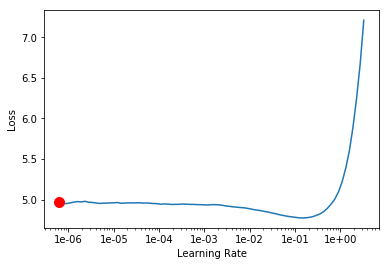

In [0]:
lm.recorder.plot(suggestion=True)

In [0]:
lm.fit_one_cycle(1, 4e-3, callbacks=[SaveModelCallback(lm, name="best_lm")], moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.604573,3.327364,0.371180,02:27


Better model found at epoch 0 with valid_loss value: 3.3273637294769287.


In [0]:
lm.unfreeze()

In [0]:
lm.fit_one_cycle(5, 4e-3, callbacks=[SaveModelCallback(lm, name="best_lm")], moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.278279,3.133239,0.404629,03:00
1,3.108839,2.870631,0.448963,03:00
2,2.722585,2.585742,0.499251,03:00
3,2.265853,2.382230,0.542392,03:00
4,1.990100,2.349920,0.553634,03:00


Better model found at epoch 0 with valid_loss value: 3.1332387924194336.
Better model found at epoch 1 with valid_loss value: 2.870631456375122.
Better model found at epoch 2 with valid_loss value: 2.5857415199279785.
Better model found at epoch 3 with valid_loss value: 2.3822295665740967.
Better model found at epoch 4 with valid_loss value: 2.3499197959899902.


In [0]:
lm.save_encoder("enc")



In [0]:
from sklearn.model_selection import train_test_split
train_x,valid_x=train_test_split(train,test_size=0.2)
train_x['is_valid']=False
valid_x['is_valid']=True

CLASSIFICATION

In [0]:
data_clf = (TextList.from_df(pd.concat([train_x, valid_x]), vocab=data_lm.vocab, cols=["drug_only_text"]).
           split_from_df("is_valid").
           label_from_df("sentiment").
           add_test(test["drug_only_text"]).
           databunch()
          )


In [0]:
clf = text_classifier_learner(data_clf, AWD_LSTM, drop_mult=0.3)

In [0]:
del lm
torch.cuda.empty_cache()

NameError: ignored

In [0]:
clf.load_encoder("enc")

In [0]:
clf.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


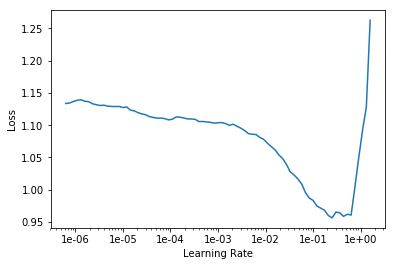

In [0]:
clf.recorder.plot()

In [0]:
clf.fit(3, 2e-3, callbacks=[SaveModelCallback(clf, name="best_clf")])

epoch,train_loss,valid_loss,accuracy,time
0,0.874322,0.726024,0.723485,00:13
1,0.698714,0.693181,0.725379,00:12
2,0.637560,0.648837,0.739583,00:12


Better model found at epoch 0 with valid_loss value: 0.726024329662323.
Better model found at epoch 1 with valid_loss value: 0.693181037902832.
Better model found at epoch 2 with valid_loss value: 0.6488372683525085.


In [0]:
clf.unfreeze()

In [0]:
clf.fit(2, 3e-4, callbacks=[SaveModelCallback(clf, name="best_clf_ft1")])

epoch,train_loss,valid_loss,accuracy,time
0,0.568300,0.629715,0.749053,00:25
1,0.493917,0.631852,0.747159,00:23


Better model found at epoch 0 with valid_loss value: 0.6297152638435364.


In [0]:
pred_val = clf.get_preds(DatasetType.Valid, ordered=True)

In [0]:
pred_val_l = pred_val[0].argmax(1)

In [0]:
from sklearn.metrics import classification_report

In [0]:
print(classification_report(pred_val[1], pred_val_l))

              precision    recall  f1-score   support

           0       0.53      0.13      0.21       128
           1       0.56      0.32      0.41       161
           2       0.78      0.94      0.85       767

    accuracy                           0.75      1056
   macro avg       0.62      0.47      0.49      1056
weighted avg       0.71      0.75      0.71      1056



In [0]:
pred_test, label_test = clf.get_preds(DatasetType.Test, ordered=True)

In [0]:
pred_test_ = pred_test.argmax(1)
pred_test_l = [data_clf.train_ds.y.classes[n] for n in pred_test_]

In [0]:
res = pd.Series(pred_test_l, index=test.index, name="sentiment")

In [0]:
res.index.name = "unique_hash"

In [0]:
pd.DataFrame(res).to_csv("submission.csv")

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

ELMO EMBEDDING

In [0]:
import re
from nltk.corpus import stopwords
nltk_stopwords = stopwords.words('english')

In [0]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@[a-zA-Z0-9_]+', '', text)   
    text = re.sub(r'https?://[A-Za-z0-9./]+', '', text)   
    text = re.sub(r'www.[^ ]+', '', text)  
    text = re.sub(r'[a-zA-Z0-9]*www[a-zA-Z0-9]*com[a-zA-Z0-9]*', '', text)  
    text = re.sub(r'[^a-zA-Z]', ' ', text)   
    text = [token for token in text.split() if len(token) > 2]
    text = ' '.join(text)
    return text

train['drug_only_text'] = train['drug_only_text'].apply(clean_text)
test['drug_only_text'] = test['drug_only_text'].apply(clean_text)

In [0]:
train['len']=train['drug_only_text'].apply(lambda x:len(x))
test['len']=test['drug_only_text'].apply(lambda x:len(x))

In [0]:
# Create datasets (Only take up to 150 words)
# train_text = train['drug_only_text'].tolist()
# train_text = [' '.join(t.split()[0:150]) for t in train_text]
# train_text = np.array(train_text, dtype=object)[:, np.newaxis]
train_label = keras.utils.to_categorical(train['sentiment'], num_classes=3, dtype='float32')
# test_text = test['drug_only_text'].tolist()
# test_text = [' '.join(t.split()[0:150]) for t in test_text]
# test_text = np.array(test_text, dtype=object)[:, np.newaxis]
# # test_label = test['sentiment'].tolist()


In [0]:
import keras
import tensorflow as tf
import tensorflow_hub as hub
from keras.engine import Layer
from keras import backend as K
import keras.layers as layers
from keras.models import Model, load_model

In [0]:
class ElmoEmbeddingLayer(Layer):
  
  def __init__(self, **kwargs):
    
    
    self.dimensions = 1024
    self.trainable = True
    super(ElmoEmbeddingLayer, self).__init__(**kwargs)
  def build(self, input_shape):
    
    self.elmo = hub.Module('https://tfhub.dev/google/elmo/2', trainable=self.trainable, name="{}_module".format(self.name))
    self.trainable_weights += K.tf.trainable_variables(scope="^{}_module/.*".format(self.name))
    super(ElmoEmbeddingLayer, self).build(input_shape)
  def call(self, x, mask=None):
    
    result = self.elmo(K.squeeze(K.cast(x, tf.string), axis=1),
                        as_dict=True,
                        signature='default',
                        )['default']
    return result
  def compute_mask(self, inputs, mask=None):
    return K.not_equal(inputs, '--PAD--')
  def compute_output_shape(self, input_shape):
    return (input_shape[0], self.dimensions)

In [0]:
def build_model(): 
  input_text = layers.Input(shape=(1,), dtype="string")
  embedding = ElmoEmbeddingLayer()(input_text)
  dense = layers.Dense(256, activation='relu')(embedding)
  pred = layers.Dense(3, activation='softmax')(dense)

  model = Model(inputs=[input_text], outputs=pred)

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
  
  return model

In [0]:
model = build_model()
model.fit(train_text, 
          train_label,
          validation_split=0.2,
          epochs=1,
          batch_size=32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
elmo_embedding_layer_4 (Elmo (None, 1024)              4         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 771       
Total params: 263,175
Trainable params: 263,175
Non-trainable params: 0
_________________________________________________________________
Train on 4223 samples, validate on 1056 samples
Epoch 1/1
4223/4223 [==============================] - 106s 25ms/step - loss: 0.7791 - acc: 0.7166 - val_loss: 0.8681 - val_acc: 0.6941


In [0]:
train_label.shape

(5279, 3)

In [0]:
from bert.tokenization import FullTokenizer
sess = tf.Session()
# Params for bert model and tokenization
bert_path = "https://tfhub.dev/google/bert_uncased_L-12_H-768_A-12/1"
max_seq_length = 256

In [0]:
from tqdm import tqdm_notebook
import tensorflow as tf

In [0]:
class PaddingInputExample(object):
    """Fake example so the num input examples is a multiple of the batch size.
  When running eval/predict on the TPU, we need to pad the number of examples
  to be a multiple of the batch size, because the TPU requires a fixed batch
  size. The alternative is to drop the last batch, which is bad because it means
  the entire output data won't be generated.
  We use this class instead of `None` because treating `None` as padding
  battches could cause silent errors.
  """

class InputExample(object):
    """A single training/test example for simple sequence classification."""

    def __init__(self, guid, text_a, text_b=None, label=None):
        """Constructs a InputExample.
    Args:
      guid: Unique id for the example.
      text_a: string. The untokenized text of the first sequence. For single
        sequence tasks, only this sequence must be specified.
      text_b: (Optional) string. The untokenized text of the second sequence.
        Only must be specified for sequence pair tasks.
      label: (Optional) string. The label of the example. This should be
        specified for train and dev examples, but not for test examples.
    """
        self.guid = guid
        self.text_a = text_a
        self.text_b = text_b
        self.label = label

def create_tokenizer_from_hub_module():
    """Get the vocab file and casing info from the Hub module."""
    bert_module =  hub.Module(bert_path)
    tokenization_info = bert_module(signature="tokenization_info", as_dict=True)
    vocab_file, do_lower_case = sess.run(
        [
            tokenization_info["vocab_file"],
            tokenization_info["do_lower_case"],
        ]
    )

    return FullTokenizer(vocab_file=vocab_file, do_lower_case=do_lower_case)

def convert_single_example(tokenizer, example, max_seq_length=256):
    """Converts a single `InputExample` into a single `InputFeatures`."""

    if isinstance(example, PaddingInputExample):
        input_ids = [0] * max_seq_length
        input_mask = [0] * max_seq_length
        segment_ids = [0] * max_seq_length
        label = 0
        return input_ids, input_mask, segment_ids, label

    tokens_a = tokenizer.tokenize(example.text_a)
    if len(tokens_a) > max_seq_length - 2:
        tokens_a = tokens_a[0 : (max_seq_length - 2)]

    tokens = []
    segment_ids = []
    tokens.append("[CLS]")
    segment_ids.append(0)
    for token in tokens_a:
        tokens.append(token)
        segment_ids.append(0)
    tokens.append("[SEP]")
    segment_ids.append(0)

    input_ids = tokenizer.convert_tokens_to_ids(tokens)

    # The mask has 1 for real tokens and 0 for padding tokens. Only real
    # tokens are attended to.
    input_mask = [1] * len(input_ids)

    # Zero-pad up to the sequence length.
    while len(input_ids) < max_seq_length:
        input_ids.append(0)
        input_mask.append(0)
        segment_ids.append(0)

    assert len(input_ids) == max_seq_length
    assert len(input_mask) == max_seq_length
    assert len(segment_ids) == max_seq_length

    return input_ids, input_mask, segment_ids, example.label

def convert_examples_to_features(tokenizer, examples, max_seq_length=256):
    """Convert a set of `InputExample`s to a list of `InputFeatures`."""

    input_ids, input_masks, segment_ids, labels = [], [], [], []
    for example in tqdm_notebook(examples, desc="Converting examples to features"):
        input_id, input_mask, segment_id, label = convert_single_example(
            tokenizer, example, max_seq_length
        )
        input_ids.append(input_id)
        input_masks.append(input_mask)
        segment_ids.append(segment_id)
        labels.append(label)
    return (
        np.array(input_ids),
        np.array(input_masks),
        np.array(segment_ids),
        np.array(labels).reshape(-1, 1),
    )

def convert_text_to_examples(texts, labels):
    """Create InputExamples"""
    InputExamples = []
    for text, label in zip(texts, labels):
        InputExamples.append(
            InputExample(guid=None, text_a=" ".join(text), text_b=None, label=label)
        )
    return InputExamples

# Instantiate tokenizer
tokenizer = create_tokenizer_from_hub_module()

# Convert data to InputExample format
train_examples = convert_text_to_examples(train_text, train_label)


# Convert to features
(train_input_ids, train_input_masks, train_segment_ids, train_labels 
) = convert_examples_to_features(tokenizer, train_examples, max_seq_length=max_seq_length)
# (test_input_ids, test_input_masks, test_segment_ids, test_labels
# ) = convert_examples_to_features(tokenizer, test_examples, max_seq_length=max_seq_length)


In [0]:
class BertLayer(tf.layers.Layer):
    def __init__(
        self,
        n_fine_tune_layers=10,
        pooling="first",
        bert_path="https://tfhub.dev/google/bert_uncased_L-12_H-768_A-12/1",
        **kwargs,
    ):
        self.n_fine_tune_layers = n_fine_tune_layers
        self.trainable = True
        self.output_size = 768
        self.pooling = pooling
        self.bert_path = bert_path
        if self.pooling not in ["first", "mean"]:
            raise NameError(
                f"Undefined pooling type (must be either first or mean, but is {self.pooling}"
            )

        super(BertLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.bert = hub.Module(
            self.bert_path, trainable=self.trainable, name=f"{self.name}_module"
        )

        # Remove unused layers
        trainable_vars = self.bert.variables
        if self.pooling == "first":
            trainable_vars = [var for var in trainable_vars if not "/cls/" in var.name]
            trainable_layers = ["pooler/dense"]

        elif self.pooling == "mean":
            trainable_vars = [
                var
                for var in trainable_vars
                if not "/cls/" in var.name and not "/pooler/" in var.name
            ]
            trainable_layers = []
        else:
            raise NameError(
                f"Undefined pooling type (must be either first or mean, but is {self.pooling}"
            )

        # Select how many layers to fine tune
        for i in range(self.n_fine_tune_layers):
            trainable_layers.append(f"encoder/layer_{str(11 - i)}")

        # Update trainable vars to contain only the specified layers
        trainable_vars = [
            var
            for var in trainable_vars
            if any([l in var.name for l in trainable_layers])
        ]

        # Add to trainable weights
        for var in trainable_vars:
            self._trainable_weights.append(var)

        for var in self.bert.variables:
            if var not in self._trainable_weights:
                self._non_trainable_weights.append(var)

        super(BertLayer, self).build(input_shape)

    def call(self, inputs):
        inputs = [K.cast(x, dtype="int32") for x in inputs]
        input_ids, input_mask, segment_ids = inputs
        bert_inputs = dict(
            input_ids=input_ids, input_mask=input_mask, segment_ids=segment_ids
        )
        if self.pooling == "first":
            pooled = self.bert(inputs=bert_inputs, signature="tokens", as_dict=True)[
                "pooled_output"
            ]
        elif self.pooling == "mean":
            result = self.bert(inputs=bert_inputs, signature="tokens", as_dict=True)[
                "sequence_output"
            ]

            mul_mask = lambda x, m: x * tf.expand_dims(m, axis=-1)
            masked_reduce_mean = lambda x, m: tf.reduce_sum(mul_mask(x, m), axis=1) / (
                    tf.reduce_sum(m, axis=1, keepdims=True) + 1e-10)
            input_mask = tf.cast(input_mask, tf.float32)
            pooled = masked_reduce_mean(result, input_mask)
        else:
            raise NameError(f"Undefined pooling type (must be either first or mean, but is {self.pooling}")

        return pooled

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_size)

In [0]:
# Instantiate tokenizer
tokenizer = create_tokenizer_from_hub_module()

In [0]:
model = build_model(max_seq_length)

# Instantiate variables
initialize_vars(sess)

model.fit(
    [train_input_ids, train_input_masks, train_segment_ids], 
    train_labels,
    validation_split=0.2,
    epochs=1,
    batch_size=32
)

AttributeError: ignored

In [0]:
#try xlnet